In [ ]:
#!pip install tensorflow

In [ ]:
#pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import random
import shutil
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = 'D:/Alzheimer_s Dataset/train'
test_dir = 'D:/Alzheimer_s Dataset/test'

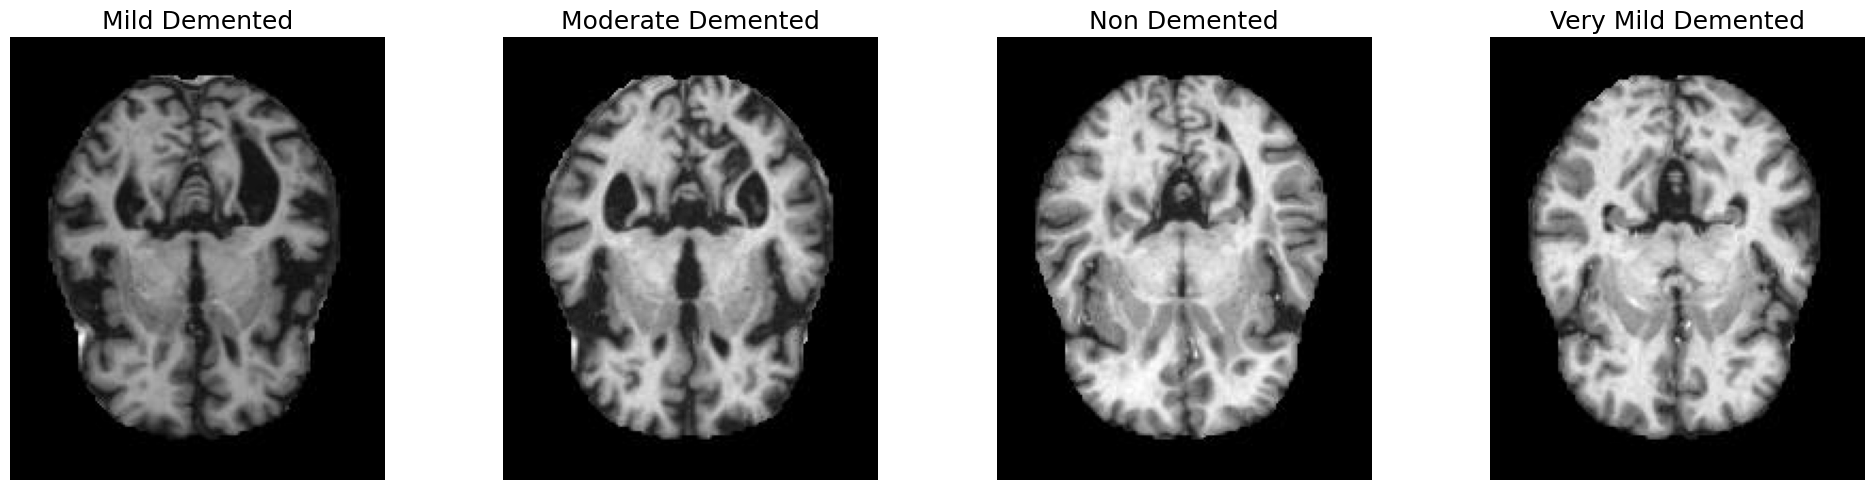

In [ ]:
MildDemented = imread('D:/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
ModerateDemented = imread('D:/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')
NonDemented = imread('D:/Alzheimer_s Dataset/train/NonDemented/nonDem0.jpg')
VeryMildDemented = imread('D:/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem0.jpg')


# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes = axes.flatten()

axes[0].imshow(MildDemented, cmap='gray')
axes[0].set_title('Mild Demented', fontsize=18)
axes[0].axis('off')

axes[1].imshow(ModerateDemented, cmap='gray')
axes[1].set_title('Moderate Demented', fontsize=18)
axes[1].axis('off')

axes[2].imshow(NonDemented, cmap='gray')
axes[2].set_title('Non Demented', fontsize=18)
axes[2].axis('off')

axes[3].imshow(VeryMildDemented, cmap='gray')
axes[3].set_title('Very Mild Demented', fontsize=18)
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
random_image='D:/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg'
print("Image Shape:",cv2.imread(random_image).shape)

Image Shape: (208, 176, 3)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 5121 images belonging to 4 classes.


In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 1279 images belonging to 4 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

C:\Users\shahz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 31/160 ━━━━━━━━━━━━━━━━━━━━ 33:48 16s/step - accuracy: 0.3949 - loss: 1.2394

In [ ]:
model.save("alzheimer_vgg16_model.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()